<a href="https://colab.research.google.com/github/AyrusCodes/Main-Project/blob/main/New_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/my_folder.zip -d /content/dataset

Archive:  /content/my_folder.zip
   creating: /content/dataset/test/
   creating: /content/dataset/train/
   creating: /content/dataset/valid/
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
   creating: /content/dataset/train/അകത്ത് അഞ്ച് ആളുകൾ ഉണ്ട്/
   creating: /content/dataset/train/അമ്മ മീൻ കറി വെച്ചു/
   creating: /content/dataset/train/നല്ല കൂട്ടുകാർ വേണം/
   creating: /content/dataset/train/നല്ല പനി ഉണ്ട്/
   creating: /content/dataset/train/രാത്രി ഭക്ഷണം വേണ്ട/
  inflating: /content/dataset/train/അമ്മ മീൻ കറി വെച്ചു/processed_Screenshot-2025-01-15-155212_png.rf.45f632c6a8e6f54b55d9a1435c1c2b05.jpg  
  inflating: /content/dataset/train/അമ്മ മീൻ കറി വെച്ചു/processed_Screenshot-2025-01-15-155212_png.rf.fc6f9cdb1514a12f93c1247a48ffbb31.jpg  
  inflating: /content/dataset/train/അമ്മ മീൻ കറി വെച്ചു/processed_Screenshot-2025-01-15-155148_png.rf.9304e4e2e2c0a723a4a854125932a818.jpg  
  inflating: /content/dataset/train/അമ്മ മീൻ ക

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Bidirectional, Input, Reshape, Dropout
from tensorflow.keras.models import Model

# Create the ImageDataGenerator for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Set your dataset path
dataset_path = "/content/dataset"  # Update to your dataset path

# Training data generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Ensure consistent class mapping across generators
class_indices = train_generator.class_indices
validation_generator.class_indices = class_indices
test_generator.class_indices = class_indices

# Define the CNN + LSTM model for sequence recognition
input_layer = Input(shape=(32, 128, 1))

# CNN feature extraction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Reshape for sequence processing
x = Reshape((16, -1))(x)

# Bidirectional LSTM layers for sequence processing
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
x = Dropout(0.2)(x)

# Dense layers for classification
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(class_indices), activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    # callbacks=[tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=5,
    #     restore_best_weights=True
    # )]
)

# Save the model
model.save("malayalam_sentence_recognition.h5")
print("Model saved successfully!")


Found 89 images belonging to 5 classes.
Found 10 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 32, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 16, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,391,045 (9.12 MB)

 Trainable params: 2,391,045 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.2487 - loss: 1.6185 - val_accuracy: 0.2000 - val_loss: 1.6244
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2206 - loss: 1.6273 - val_accuracy: 0.2000 - val_loss: 1.6122
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2285 - loss: 1.6228 - val_accuracy: 0.2000 - val_loss: 1.6101
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2450 - loss: 1.6086 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1780 - loss: 1.6115 - val_accuracy: 0.2000 - val_loss: 1.6091
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2613 - loss: 1.6117 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1738 - loss: 1.6150 - val_accuracy: 0.2000 - val_loss: 1.6090
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2239 - loss: 1.6068 - val_accuracy: 0.2000 - val_loss: 1.6088

Model saved successfully!


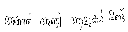

True

In [51]:
import cv2
from google.colab.patches import cv2_imshow

# Function to preprocess the image
def preprocess_image(image_path, target_width=128, target_height=32, scale_factor=1.5):
    # Load the image
    image = cv2.imread(image_path)

    # Step 1: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Scale the image by a factor (e.g., 1.5 means 150% of original size)
    width = int(gray_image.shape[1] * scale_factor)
    height = int(gray_image.shape[0] * scale_factor)
    scaled_image = cv2.resize(gray_image, (width, height))

    # Step 3: Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)

    # Step 4: Apply thresholding to binarize the image
    _, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

    # Step 5: Perform histogram equalization to enhance contrast
    equalized_image = cv2.equalizeHist(thresholded_image)

    # Step 6: Resize the image to match the model's expected input size (32x128)
    img_resized = cv2.resize(equalized_image, (target_width, target_height))

    # Step 7: Normalize pixel values to the range [0, 1]
    img_normalized = img_resized / 255.0

    # Step 8: Add channel and batch dimensions (model expects a 4D input: batch_size, height, width, channels)
    img_normalized = img_normalized.reshape((1, target_height, target_width, 1))

    # Display the processed image
    cv2_imshow(img_resized)

    # Return the preprocessed image
    return img_normalized

# Example usage:
image_path = '/content/Screenshot 2025-01-15 155508.png'  # Replace with your image path
preprocessed_image = preprocess_image(image_path)

# Save the processed image as a new file (optional)
cv2.imwrite('processed_output_scaled.jpg', preprocessed_image[0, :, :, 0])  # Save the first (and only) image from batch


In [52]:
import tensorflow as tf
import numpy as np
import os

# Function to predict the label of an image
def predict_sentence(img_array, model, class_mapping):
    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a sentence using the class mapping
    predicted_sentence = class_mapping.get(predicted_class_index, "Unknown Class")
    confidence = predictions[0][predicted_class_index] * 100

    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Sentence: {predicted_sentence}")
    print(f"Confidence: {confidence:.2f}%")

    return predicted_sentence

# Load the trained model
model_path = "malayalam_sentence_recognition.h5"  # Replace with the actual model path
model = tf.keras.models.load_model(model_path)

# Dynamically generate class mapping based on folder names in the 'train' directory
train_directory = "/content/dataset/train"  # Update this path to your train directory
class_labels = sorted(os.listdir(train_directory))  # Folder names inside the 'train' directory
class_mapping = {idx: label for idx, label in enumerate(class_labels)}

# Print the class mapping for verification
print(f"Class Mapping: {class_mapping}")

# Example usage:
# Assuming you already have `preprocessed_image` from the first script
predicted_sentence = predict_sentence(preprocessed_image, model, class_mapping)
print(f"\nPredicted Sentence: {predicted_sentence}")


Class Mapping: {0: 'അകത്ത് അഞ്ച് ആളുകൾ ഉണ്ട്', 1: 'അമ്മ മീൻ കറി വെച്ചു', 2: 'നല്ല കൂട്ടുകാർ വേണം', 3: 'നല്ല പനി ഉണ്ട്', 4: 'രാത്രി ഭക്ഷണം വേണ്ട'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step

Prediction Results:
--------------------------------------------------
Predicted Sentence: അമ്മ മീൻ കറി വെച്ചു
Confidence: 96.89%

Predicted Sentence: അമ്മ മീൻ കറി വെച്ചു
